In [207]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 24 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [208]:
NAME = "Seyedeh Tina Miryeganeh"
STUDENT_ID = "1815127"

## Problem 1 - Yield Dataset with Polynomial Regression

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [210]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [211]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [212]:
downloaded = drive.CreateFile({'id':"1snU4nKrW72fgaEYzWvnrK0iRhsVX2W7N"})
downloaded.GetContentFile('yield.csv')  

In [213]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [214]:
# Let's look at the data
data

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [215]:
# Look at data description
data.describe()

,Temp,Yield
count,15.000000,15.000000
mean,78.000000,2.833333
std,17.808505,0.395811
min,50.000000,2.100000
25%,70.000000,2.550000
50%,80.000000,2.900000
75%,90.000000,3.050000
max,100.000000,3.500000


In [216]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

(10,) (5,) (10,) (5,)


### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [217]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
#regressor = ### YOUR CODE HERE ### 
regressor = LinearRegression()

# Fit the regressor using X_train and y_train

### YOUR CODE HERE ###
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

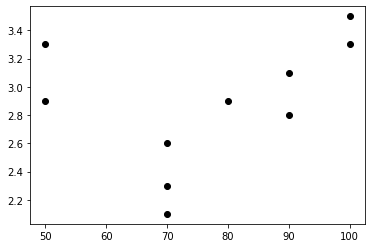

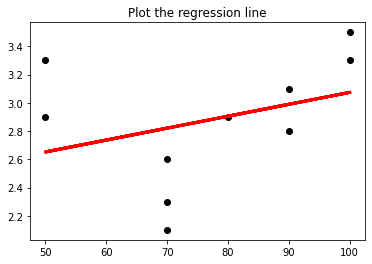

In [218]:

# Plot the actual yield (y_train) vs. temperature values from training set

### YOUR CODE HERE ###

# plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train, 'o' ,color='black')
# plt.title('yield vs. temperature points from training set')
plt.show()


# Plot the regression line
### YOUR CODE HERE ###

y_train_predict = regressor.predict(X_train)
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train_predict, color='red', linewidth=3)
plt.title('Plot the regression line')
plt.show()



Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

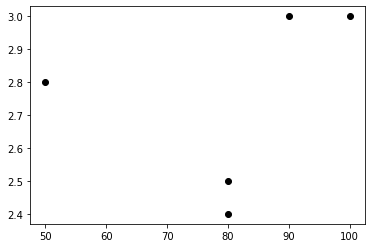

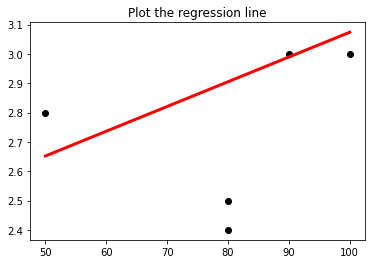

In [219]:
# Plot the actual yield (y_test) vs. temperature values  for the test set

# ### YOUR CODE HERE ###
# plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test, 'o', color='black')
# plt.title('yield vs. temperature points from test set')
plt.show()

# Plot the regression line
### YOUR CODE HERE ###
y_train_predict = regressor.predict(X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_train_predict, color='red', linewidth=3)
plt.title('Plot the regression line')
plt.show()




### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

[YOUR ANSWER HERE]
It is bad fit since it didn't cover some features on the trainning and the testing  

Does the model display signs of underfitting? If so, why?

[YOUR ANSWER HERE]
Yes, because it seems that this model is generating a high error rate on both the training set and testing set both.

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [220]:
# First, lets look at the values of X_train
print(X_train)

[[ 70]
 [ 50]
 [100]
 [ 90]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 70]
 [100]]


In [221]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [222]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression() 

# Fit the regressor using X_train_pol and y_train

### YOUR CODE HERE ###
regressor.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

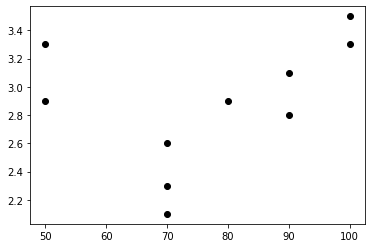

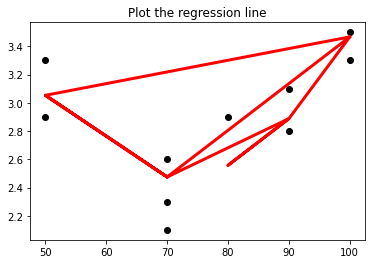

In [223]:
# Plot the actual yield (y_train) vs temp. values from training set

### YOUR CODE HERE ###
#plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train, 'o' ,color='black')
# plt.scatter(X_test, y_test, color='black')
# plt.plot(X_test, y_test, color='black', linewidth=3)
# plt.title('yield vs. temperature points from test set')
plt.show()

# Plot the regression line

### YOUR CODE HERE ###

y_train_predict = regressor.predict(X_train_pol)
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train_predict, color='red', linewidth=3)
plt.title('Plot the regression line')
plt.show()


Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

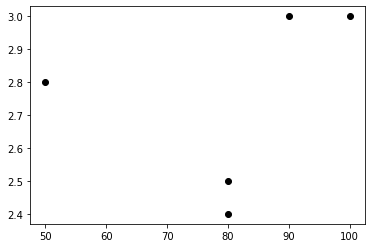

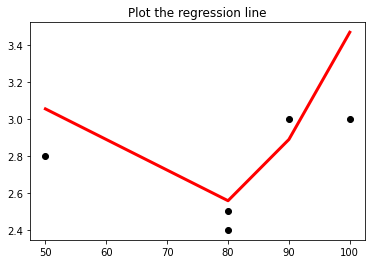

In [224]:
# Plot the actual yield (y_test) vs temp. values from test set

### YOUR CODE HERE ###
#plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, y_test, 'o' ,color='black')
# plt.scatter(X_test, y_test, color='black')
# plt.plot(X_test, y_test, color='black', linewidth=3)
# plt.title('yield vs. temperature points from test set')
plt.show()

# Plot the regression line

### YOUR CODE HERE ###
y_test_predict = regressor.predict(X_test_pol)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_predict, color='red', linewidth=3)
plt.title('Plot the regression line')
plt.show()


### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

[YOUR ANSWER HERE]



Yes it fits better because it sees the data better in both trainign and testing set in compare to a simple linear regression.

Does the model address display more or less underfitting than the simple linear regression model and why?

[YOUR ANSWER HERE]




It is less underfitting because it is a curve seeing all the dots in the plot shows that the rate of error should be less in both sets. 

## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [225]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [226]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [227]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"1AtMi-xCejVlhYS5qjgjjW4gH-TLuWJjC"})
downloaded.GetContentFile('Fish.csv')  

In [228]:
# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [229]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [230]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [231]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [232]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [233]:
# Delete any rows for which there is a measurement of 0.0 for weight.
### YOUR CODE HERE ###
#fish_data[(fish_data[['Weight']] != 0).all(axis=1)]
fish_data.drop(fish_data[fish_data['Weight'] == 0.0].index, inplace=True)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [234]:
### YOUR CODE HERE ###

columns = ['Weight', 'Length1','Length2', 'Length3', 'Height', 'Width']
for column in columns: 
  fish_data['temp'] = (fish_data[column] - np.mean(fish_data[column]))/np.std(fish_data[column])
  fish_data = fish_data.drop(fish_data[fish_data['temp']> 4].index)
  fish_data = fish_data.drop(fish_data[fish_data['temp']<= -4].index)
  fish_data = fish_data.drop(columns=['temp'])

fish_data.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


[YOUR ANSWER HERE] No there is no outliers because no data is revomed from the data set

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [235]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [236]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [237]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [238]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test) 

# Print the predictions along with actual weights
### YOUR CODE HERE ### 
print(y_fish_pred, '\n', y_fish_test)



# print(y_fish_pred, y_fish_test['weights'])


[ 476.59117882  207.99295613  696.61277798  829.8356242   155.66081611
  839.43077312  756.42454219  860.9053846   648.06518937  194.36935617
  656.33115593  988.3533044   694.41908995   27.97315647   90.40492061
  279.88428528  426.51714491  253.27497124  988.3533044   380.41382554
  203.773294    873.13422668  776.42866652  514.64529123  156.2549434
   98.82407554  423.34057751  638.76055132 -203.30791322  611.87530104
  352.87773986  307.75783507] 
 [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [239]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
mean_squared_error(y_fish_test, y_fish_pred)
print('\n')

# Compute the coefficient of determination using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
r2_score(y_fish_test, y_fish_pred)



0.8245122776931352

Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

[YOUR ANSWER HERE]


mean_squared_error : 31561.773067541344





Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]

r2_score: 0.8245122776931352

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [240]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2)

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)
X_fish_test_pol = poly.fit_transform(X_fish_test)

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
### YOUR CODE HERE ###
print(X_fish_train_pol[0:5,:])

[[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
  1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
  1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
  1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
  5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
  2.79354532e+01]
 [1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
  6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
  1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
  1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
  2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
  1.61587920e+01]
 [1.00000000e+00 4.00000000e+01 4.25000000e+01 4.55000000e+01
  6.82500000e+00 4.45900000e+00 1.60000000e+03 1.70000000e+03
  1.82000000e+03 2.73000000e+02 1.78360000e+02 1.80625000e+03
  1.93375000e+03 2.90062500e+02 1.89507500e+02 2.07025000e+03
  3.10537500e+02 2.02884500e+02 4.65806250e+01 3.04326750e+01
  1.98826810e+01]
 [1.00000000e+00

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [241]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()

# Fit the regressor using X_fish_train_pol and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train_pol, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [242]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)  

# Print the predictions along with actual weights
### YOUR CODE HERE ###
print(y_fish_pol_pred, '\n', y_fish_test)

[ 410.78161734  144.99000843  661.08994618  916.20938635  120.28326146
  892.29452538  779.33036275  970.51372058  613.97188853  138.75685095
  702.96694468 1200.88080985  736.01964613   68.24127116   65.41870351
  204.06717258  348.32997005  164.86007088 1200.88080985  301.29364676
  132.03878287 1080.95184924  800.55488719  465.06392928  113.12282845
   78.16667224  337.9263526   610.88838108   14.31425669  526.27843992
  265.75936168  235.08321339] 
 [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [243]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
mean_squared_error(y_fish_test, y_fish_pol_pred)
print('\n')
# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
r2_score(y_fish_test, y_fish_pol_pred)

0.9302055934939845

Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

[YOUR ANSWER HERE]


mean_squared_error: 12552.64579521197

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]

r2_score: 0.9302055934939845

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [244]:
# print('fish_data = ',fish_data)

# Create a copy of fish_data
fish_data_species = fish_data

# print('fish_data = ',fish_data)
# print('fish_data_species = \n',fish_data_species)
# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = fish_data_species['Species'].map(dict(Bream=0, Roach=1, Whitefish=2, Parkki=3, 
                                           Perch=4, Pike=5, Smelt=6))

#print('fish_data_species = \n',fish_data_species['Species'])
#print('level_dict \n', level_dict)
# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    ### YOUR CODE HERE ###
    return level
    #print("Inside func!")
    #fish_data_species['Species'] = level
    # level = {
    #     "Bream": 0,
    #     "Roach": 1,
    #     "Whitefish": 2,
    #     "Parkki": 3,
    #     "Perch": 4,
    #     "Pike": 5,
    #     "Smelt": 6,
    # }

# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = integer_encode_level(level_dict)
# 

# Check data
fish_data_species

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will now create a dataset with 1 target column and 6 feature columns: Species, Length1, Length2, Length3, Height, Width. 

In [246]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 1] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Species  Length1  Length2  Length3   Height   Width
0        0     23.2     25.4     30.0  11.5200  4.0200
1        0     24.0     26.3     31.2  12.4800  4.3056
2        0     23.9     26.5     31.1  12.3778  4.6961
3        0     26.3     29.0     33.5  12.7300  4.4555
4        0     26.5     29.0     34.0  12.4440  5.1340

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [247]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [248]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
### YOUR CODE HERE ###
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [249]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)


# Print the predictions along with actual weights
### YOUR CODE HERE ###
print(y_fish_pred_categorical, '\n', y_fish_test) 

[ 462.41622504  140.46342332  707.81903709  871.12283244  143.05409674
  843.12937914  769.57751944  868.49680239  666.59839913  194.15313938
  672.81491228  960.51330242  736.90986176   -2.95444362   41.01945186
  284.75537218  561.73456426  224.74914601  960.51330242  350.84272643
   72.02506985  829.14247276  732.9478214   509.48163199   42.63910432
  -17.63979818  419.59866662  639.90483734 -123.28748213  564.13814055
  296.09034527  277.24831537] 
 [ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [250]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical)
print('\n')


# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
r2_score(y_fish_test_categorical, y_fish_pred_categorical)

0.807183047430761

Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

[YOUR ANSWER HERE]

mean_squared_error: 34678.46536821308

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]

r2_score:  0.807183047430761

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

Species 6.639 +/- 0.911
Weight  0.980 +/- 0.179
Length3 0.172 +/- 0.043
Length2 0.111 +/- 0.033
Length1 0.105 +/- 0.052

 [0.00000000e+00 1.19913398e+04 1.28893159e+03 2.11808997e+04
 3.51127889e-05 1.02085260e-11 3.18858789e-07 5.91019011e-06
 4.22854073e-06 2.43424262e-04] 


 [0.00000000e+00 3.15617731e+04 1.25526458e+04 2.90441682e+05
 1.11227736e+12 5.08048817e+07 3.68500106e+07 2.84407987e+09
 9.78391078e+10 2.05072210e+12] 

109.50752921612458
0.8907118198799737
177.47073099014494
0.8248787612621278
109.51415275709833
0.8906985989327774
177.29940182414336
0.8252167200125812
109.52364412509345
0.8906796522532968
177.14001566402513
0.8255308272667287
109.5351481451351
0.8906566857143381
176.99073728141758
0.8258247586158914
109.54805107272034
0.8906309235368629
176.85010247554732
0.8261014439370847
109.561909197997
0.8906032508176294
176.7169290183453
0.8263632470347401
109.57640004362204
0.8905743109013771
176.59025196469497
0.8266120959560685
109.5912885001836
0.8905445729231474

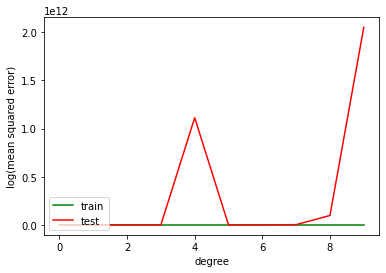

In [300]:
### YOUR CODE HERE ###
##how you want to design your own model.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from statistics import mean
from math import sqrt


# model = Ridge(alpha=1e-2).fit(X_fish_train, y_fish_train)
# print(model.score(X_fish_test, y_fish_test))
regressor =  LinearRegression()
regressor.fit(X_fish_train, y_fish_train)


r = permutation_importance(regressor, X_fish_test, y_fish_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{fish_data.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")




train_error = np.empty(10)
train_error[0] = 0
test_error = np.empty(10)
test_error[0] = 0
for degree in range(1,10):
  poly = PolynomialFeatures(degree)
  X_fish_train_pol = poly.fit_transform(X_fish_train)
  X_fish_test_pol = poly.fit_transform(X_fish_test)
  regressor =  LinearRegression()

  regressor.fit(X_fish_train_pol, y_fish_train)

  train_error[degree] = mean_squared_error(y_fish_train, regressor.predict(X_fish_train_pol))
  test_error[degree] = mean_squared_error(y_fish_test, regressor.predict(X_fish_test_pol))

print("\n", train_error, "\n")
print("\n", test_error, "\n")
plt.plot(np.arange(10), train_error, color='green', label='train')
#plt.plot(np.arange(10), test_error, color='red', label='test')

plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='lower left')
 
#plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')

plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='lower left')


alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
  rr = Ridge(alpha = i * 0.25)
  rr.fit(X_fish_train, y_fish_train) 
  pred_train_rr= rr.predict(X_fish_train)
  print(np.sqrt(mean_squared_error(y_fish_train,pred_train_rr)))
  print(r2_score(y_fish_train, pred_train_rr))

  pred_test_rr= rr.predict(X_fish_test)
  print(np.sqrt(mean_squared_error(y_fish_test,pred_test_rr))) 
  print(r2_score(y_fish_test, pred_test_rr))


Lambda = []

for i in range(1, 9):
  model_lasso = Lasso(alpha = i * 0.25, tol = 0.0925)
  model_lasso.fit(X_fish_train, y_fish_train) 
  pred_train_lasso= model_lasso.predict(X_fish_train)
  print(np.sqrt(mean_squared_error(y_fish_train,pred_train_lasso)))
  print(r2_score(y_fish_train, pred_train_lasso))

  pred_test_lasso= model_lasso.predict(X_fish_test)
  print(np.sqrt(mean_squared_error(y_fish_test,pred_test_lasso))) 
  print(r2_score(y_fish_test, pred_test_lasso))





# # List to maintain the different cross-validation scores
# cross_val_scores_ridge = []
 
# # List to maintain the different values of alpha
# alpha = []
 
# # Loop to compute the different values of cross-validation scores
# for i in range(1, 9):
#     ridgeModel = Ridge(alpha = i * 0.25)
#     ridgeModel.fit(X_fish_train, y_fish_train)
#     scores = cross_val_score(ridgeModel, X_fish_test, y_fish_test, cv = 10)
#     avg_cross_val_score = mean(scores)*100
#     cross_val_scores_ridge.append(avg_cross_val_score)
#     alpha.append(i * 0.25)
 
# # Loop to print the different values of cross-validation scores
# for i in range(0, len(alpha)):
#     print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

# # Building and fitting the Ridge Regression model
# ridgeModelChosen = Ridge(alpha = 0.25)
# ridgeModelChosen.fit(X_fish_train, y_fish_train)
 
# # Evaluating the Ridge Regression model
# print("\n", ridgeModelChosen.score(X_fish_test, y_fish_test))


# cross_val_scores_lasso = []
 
# # List to maintain the different values of Lambda
# Lambda = []
 
# # Loop to compute the cross-validation scores
# for i in range(1, 9):
#     lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
#     lassoModel.fit(X_fish_train, y_fish_train)
#     scores = cross_val_score(lassoModel, X_fish_test, y_fish_test, cv = 10)
#     avg_cross_val_score = mean(scores)*100
#     cross_val_scores_lasso.append(avg_cross_val_score)
#     Lambda.append(i * 0.25)
 
# # Loop to print the different values of cross-validation scores
# for i in range(0, len(alpha)):
#     print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

#     # Building and fitting the Lasso Regression Model
# lassoModelChosen = Lasso(alpha = 0.5, tol = 0.0925)
# lassoModelChosen.fit(X_fish_train, y_fish_train)
 
# # Evaluating the Lasso Regression model
# print(lassoModelChosen.score(X_fish_test, y_fish_test))





[YOUR ANSWER HERE]

The second models we ran worked the best (degree 2) because the error on training set and testing set are both low.

From the Ridge, we can conclude that the best value of alpha for the data is 0.25.
From the Lasso, we can conclude that the best value of alpha for the data is 0.5.
 